In [1]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys
import logging

import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loading as dl

In [3]:
sys.path.append(os.path.abspath("../"))

# Now import your scripts
from scripts.eda import check_missing_values, check_duplicates, check_outliers,check_stationarity, save_cleaned_data

from scripts.visualizer import plot_historical_prices,plot_rolling_statistics,plot_price_trend_over_years,plot_with_events,plot_time_series_decomposition
from scripts.analyzer import analyze_events

#from scripts.logger import logger 

In [4]:
logger = logging.getLogger('EDA Logger')
logger.setLevel(logging.DEBUG)

In [5]:
# load the data
data = dl.load_data("BrentOilPrices.csv")
print("head of the BrentOilPrices ")
data.head()

head of the BrentOilPrices 


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")





C:\Users\HP\AppData\Local\Temp\ipykernel_16912\620957423.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


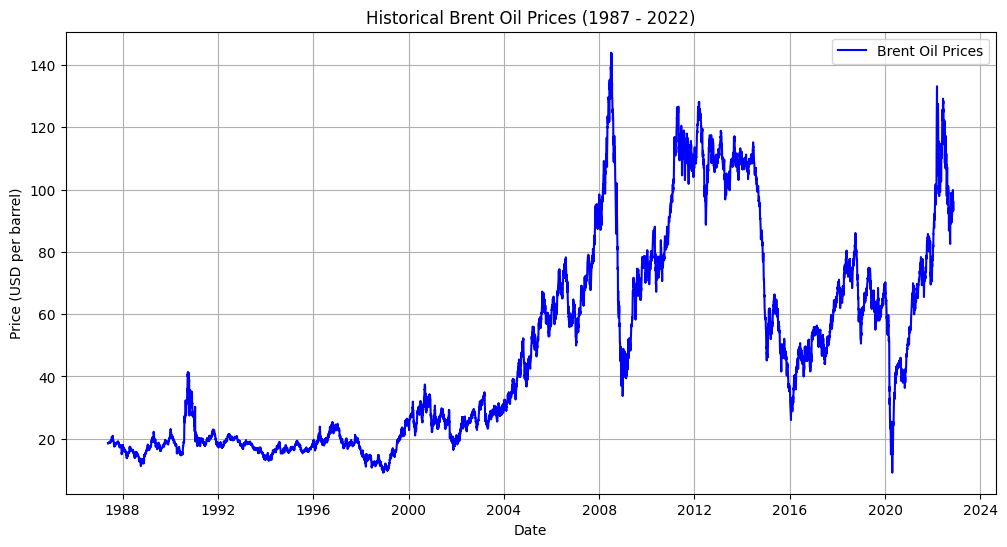

In [7]:
# Plot historical prices
plot_historical_prices(data)

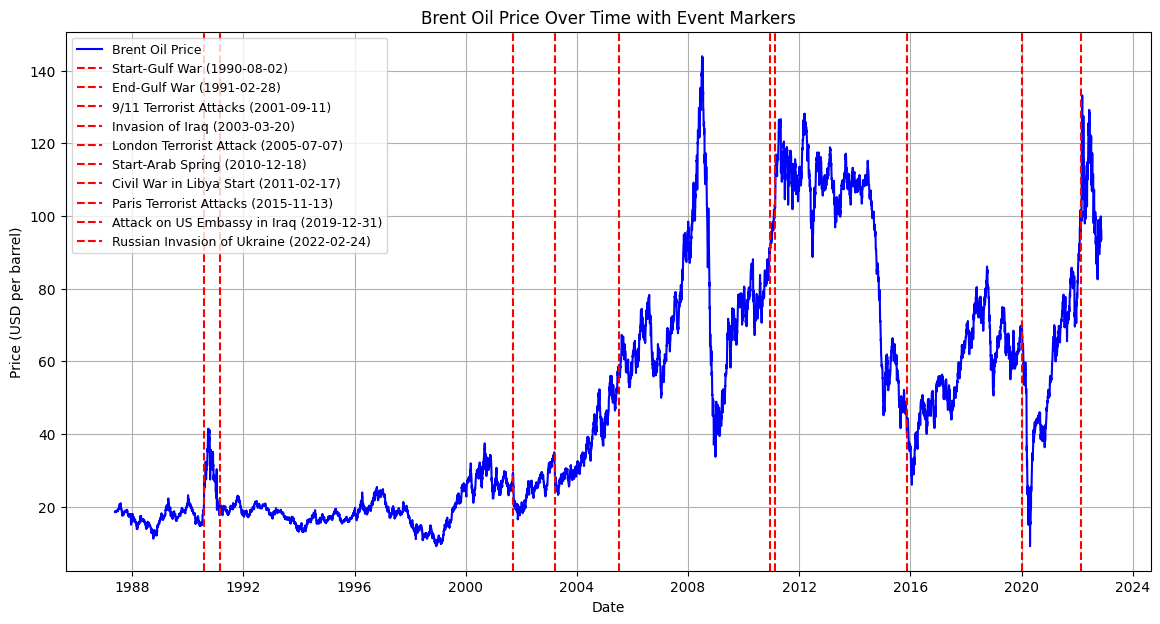

In [8]:

plot_with_events(data)


In [9]:
analyze_events(data)

TypeError: visualize_event_impact() missing 1 required positional argument: 'event_impact_df'